## Read file after Factor Analysis

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import math

import sys
import os
sys.path.append(os.path.abspath(".."))  
sys.path.append(os.path.abspath("./src")) 

from src.data_processing import get_outliers_df, merge_distance_column, process_lonely_observations, modify_species_id
from src.model import scale_features, find_lonely_observations, calculate_confusion_matrix_and_metrics
from src.visualization import plot_dendrogram_lonelylabels, plot_boxplot_with_outliers, plot_confusion_matrix, plot_outliers, plot_isolated_observations_by_species


# Load file after Factor Analysis Steps
data_path = "../data/"
output_path = '../output/'

#dataset ='Automatic_Labeling_Kyoogu/'
dataset ='Dataset_1/'
#dataset ='Dataset_2/'

file = 'Reduced_dataframe_FA2.xlsx'
output_file = 'isolated_observations.xlsx'
df_reduced = pd.read_excel(data_path+dataset+file,index_col=0)
df_reduced



,Factor1,Factor2,Factor3,spectral_flatness,DeltaFreq,Specie_ID
18,-1.199992,3.504971,-802.455241,0.712880,539.0625,Boana_platanera
21,7.139431,6.651630,-983.474546,0.677825,914.0625,Leptodactylus_fuscus
24,4.878908,8.702904,-1060.409103,0.581228,703.1250,Leptodactylus_fuscus
26,-11.914390,1.998143,-1242.348098,0.562240,1054.6875,Leptodactylus_fuscus
30,6.679592,1.986054,-1091.249990,0.490381,820.3125,Leptodactylus_fuscus
...,...,...,...,...,...,...
11444,-5.903070,3.501957,-1894.487028,0.406058,984.3750,Troglodytes_aedon
11445,3.661997,4.552104,-1219.612547,0.593010,1148.4375,Troglodytes_aedon
11451,-2.993427,3.530395,-1941.652206,0.480747,984.3750,Troglodytes_aedon
11452,12.356116,4.608775,-1227.659540,0.499189,1335.9375,Troglodytes_aedon


## Isolated observations and the percentage of them related to the dataset

In [34]:
only_features_scaled = scale_features(df_reduced) # Divide data in Features and Labels. Scale Features and convert to Data Frame with same index as df_reduced
lonely_observations, lonely_observations_df = find_lonely_observations(df_reduced, only_features_scaled) # Find isolated observations from 

#Calculate the percentage of "lonely" observations
num_lonely_observations = len(lonely_observations_df)
num_total_observations = len(df_reduced)
percentage_lonely = (num_lonely_observations / num_total_observations) * 100

# Display the result
print(f'\nThe total number of observations is: {num_total_observations}')
print(f'The number of lonely observations is: {num_lonely_observations}')
print(f"Percentage of lonely observations in relation with the Dataset: {percentage_lonely:.2f}%")




The total number of observations is: 1465
The number of lonely observations is: 188
Percentage of lonely observations in relation with the Dataset: 12.83%


In [35]:
lonely_observations_df.to_excel(output_path+dataset+output_file, index=False)
lonely_observations_df


,Lonely Index,Specie_ID,Nearest Same Label Index,Distance
0,9411,Amazona_amazonica,9414,3
1,4797,Troglodytes_aedon,11317,4
2,2192,Pitangus_sulphuratus,2578,565
3,4810,Troglodytes_aedon,11380,1
4,2580,Crotophaga_ani,2619,2
...,...,...,...,...
183,899,Boana_platanera,1023,1
184,10356,Nyctidromus_albicollis,10364,1
185,2390,Crotophaga_ani,1874,38
186,2064,Leptodactylus_fuscus,2015,9


## Dendrogram of isolated observations.

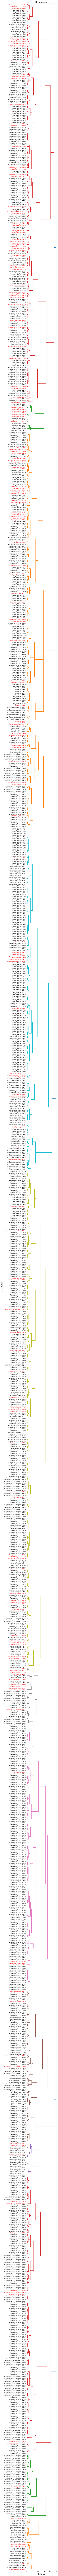

In [36]:
plot_dendrogram_lonelylabels(df_reduced, only_features_scaled, lonely_observations)

## Boxplots of isolated observations

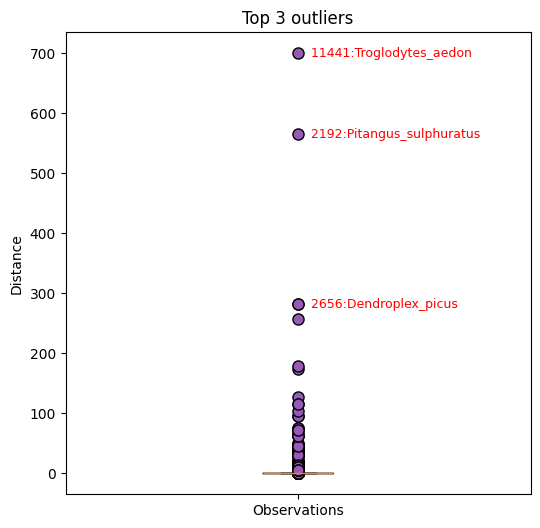

The total number of outliers is: 188
The total number of isolated observations is: 188


In [37]:
outliers = plot_outliers(df_reduced, lonely_observations_df)
# Calculate the number of outliers
num_outliers = len(outliers)
print(f'The total number of outliers is: {num_outliers}')
print(f'The total number of isolated observations is: {num_lonely_observations}')

In [57]:
# from matplotlib.lines import Line2D

# Q1 = lonely_observations_df['Distance'].quantile(0.25)
# Q3 = lonely_observations_df['Distance'].quantile(0.75)
# IQR = Q3 - Q1

# # Define the upper bound for outliers
# upper_bound = Q3 

# # Identify the outliers
# outliers = lonely_observations_df[lonely_observations_df['Distance'] > upper_bound]
# outliers['Distance'] = pd.to_numeric(outliers['Distance'], errors='coerce')
# species_order = lonely_observations_df.groupby('Specie_ID')['Distance'].mean().sort_values(ascending=False).index




# plt.figure(figsize=(12, 8))

# # Plot each outlier as a point in the sorted species order
# for specie_id in species_order:
#     specie_outliers = outliers[outliers['Specie_ID'] == specie_id]
    
#     # Plot all outliers for the species
#     plt.scatter([specie_id] * len(specie_outliers), specie_outliers['Distance'], 
#                 alpha=0.55, edgecolor='black', s=75)
    
#     # Get the top N outliers for this species based on Distance
#     top_outliers = specie_outliers.nlargest(2, 'Distance')
    
#     # Add labels for the top N outliers with alternate offsets to avoid overlap
#     for j, (_, row) in enumerate(top_outliers.iterrows()):
#         # Alternate y_offset for each point to avoid overlap
#         y_offset = 4 if j % 2 == 0 else -4  # Adjust the offset as needed
#         plt.annotate(f"{row['Lonely Index']}", 
#                         (specie_id, row['Distance']), 
#                         textcoords="offset points", xytext=(16, y_offset), ha='center',
#                         fontsize=10, color='red')

# # Custom legend elements
# legend_elements = [
#     Line2D([0], [0], marker='o', color='w', label='Isolated observation (outliers)', 
#             markerfacecolor='black', markersize=8, alpha=0.55),
#     Line2D([0], [0], marker='*', color='w', label=f'Top species outlier indices', 
#             markerfacecolor='red', markersize=10)
# ]

# plt.legend(handles=legend_elements, loc='upper right', fontsize=14)

# plt.title('Isolated Observations by Species', fontsize=16)
# plt.xlabel('Species', fontsize=14)
# plt.ylabel('Distance', fontsize=14)
# plt.xticks(rotation=90, fontstyle='italic', fontsize=12)
# plt.show()

# num_outliers = len(outliers)
# print(f'The total number of outliers is: {num_outliers}')


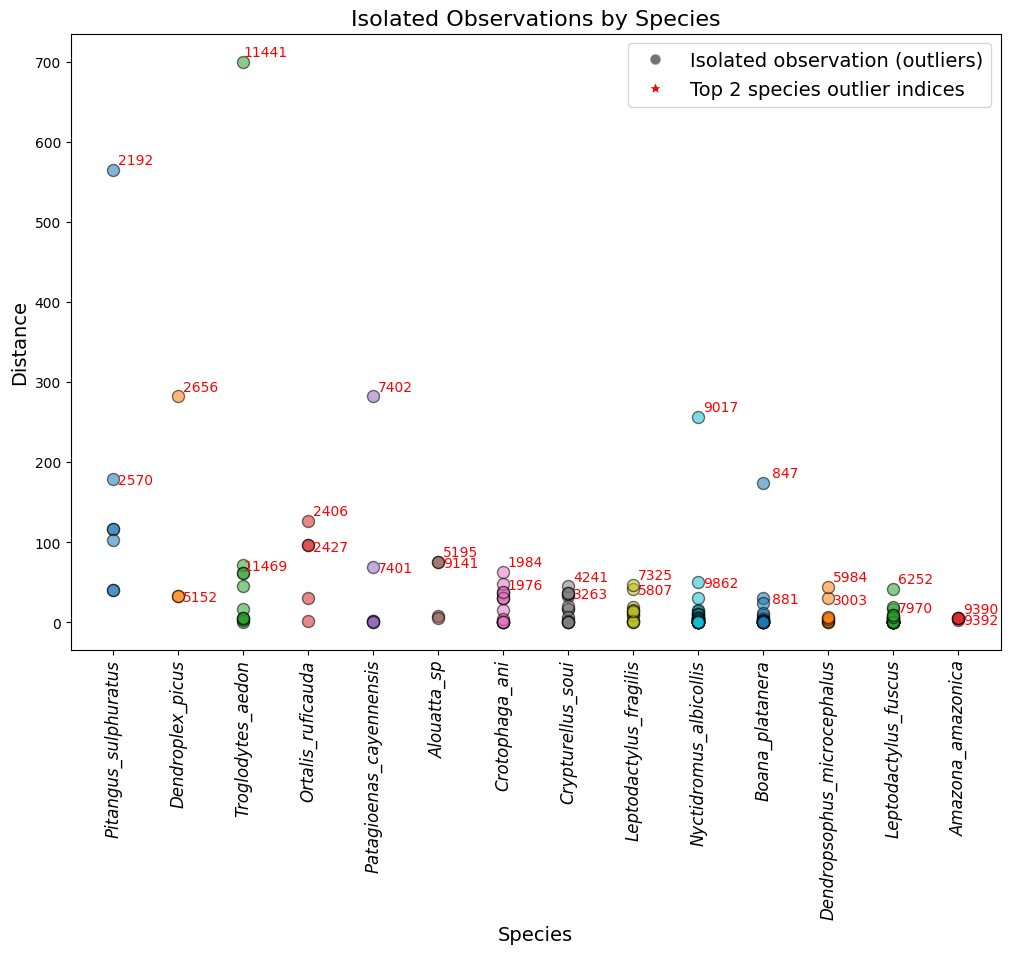

In [52]:
plot_isolated_observations_by_species(lonely_observations_df)

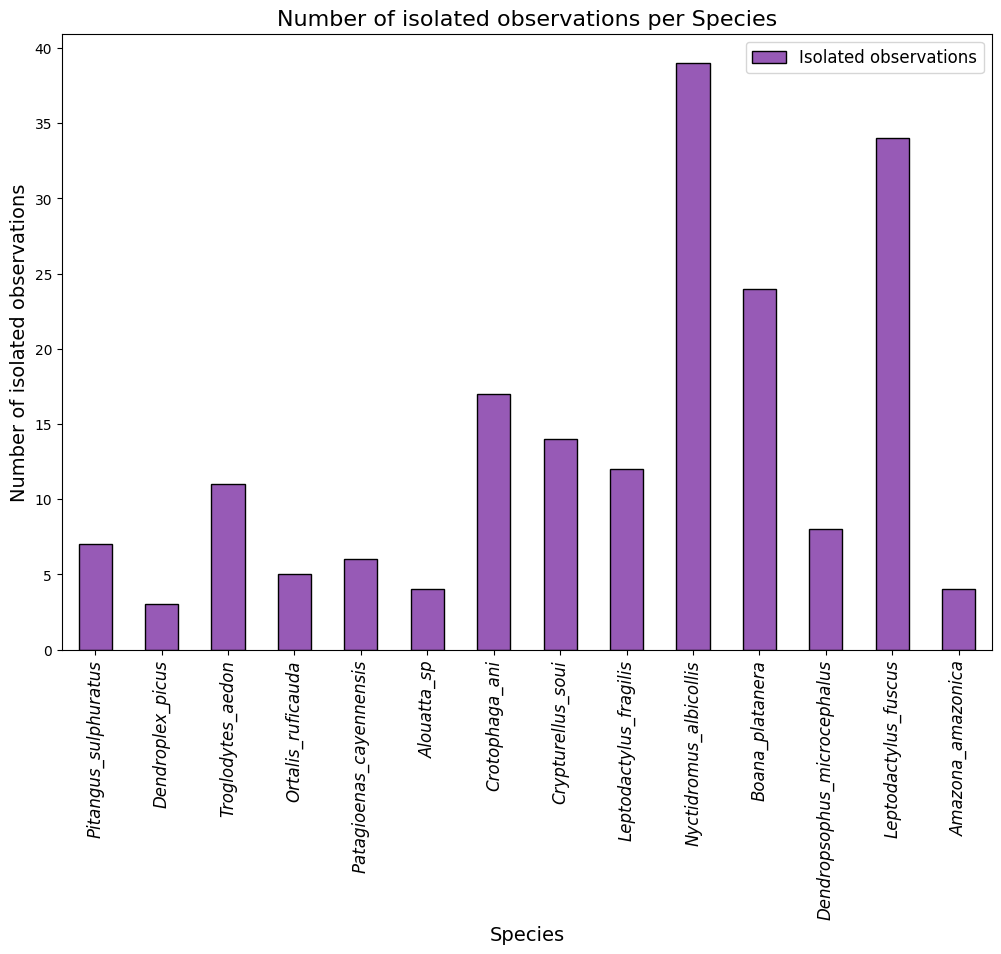

In [39]:
# Calculate species order by average distance (reuse from previous function)
species_order = lonely_observations_df.groupby('Specie_ID')['Distance'].mean().sort_values(ascending=False).index

# Group by species and count outliers, then reorder by species_order
outliers_by_species = lonely_observations_df.groupby('Specie_ID').size().reindex(species_order)

# Plot the outliers by species in the specified order
plt.figure(figsize=(12, 8))
outliers_by_species.plot(kind='bar', color='#975ab6', edgecolor='black', label='Isolated observations')
plt.title('Number of isolated observations per Species', fontsize=16)
plt.xlabel('Species', fontsize=14)
plt.ylabel('Number of isolated observations', fontsize=14)
plt.xticks(rotation=90, fontstyle='italic', fontsize=12)
plt.legend(loc='upper right', fontsize=12)
plt.show()



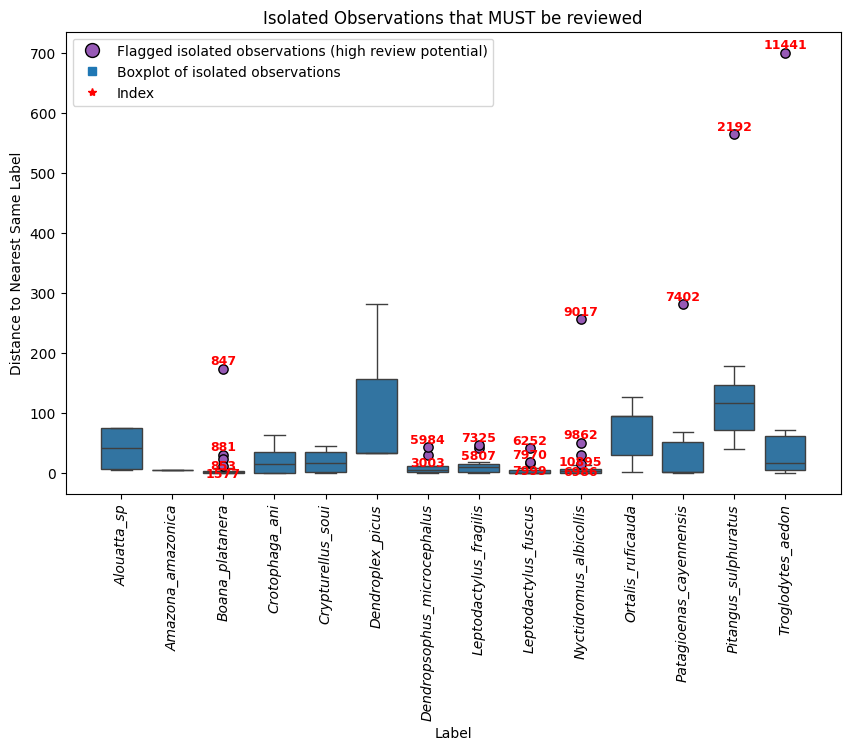

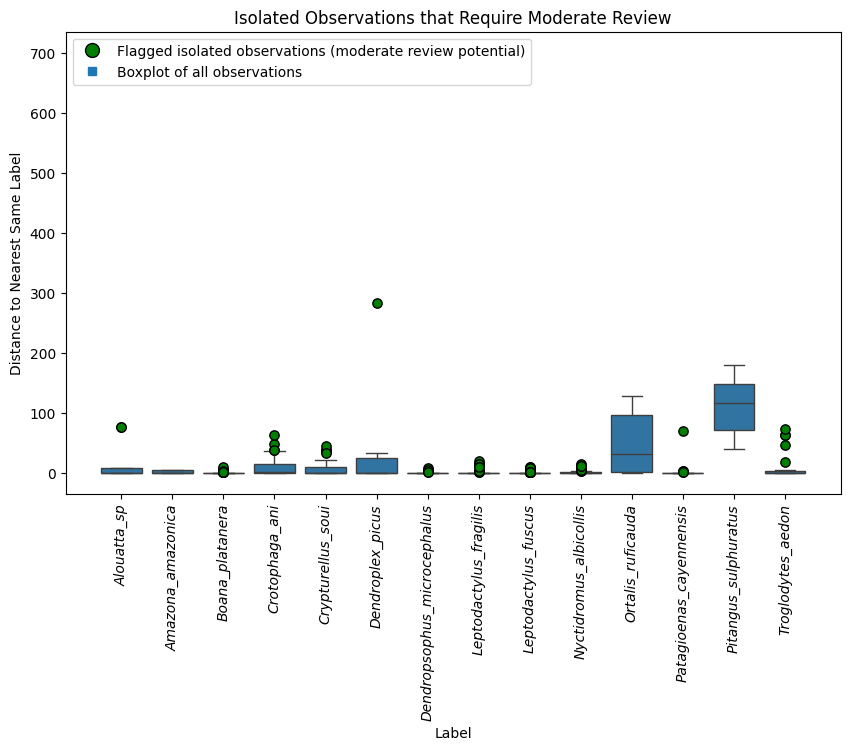

In [40]:
# Example usage for high and moderate review plots with custom boxplot legend text
data_full = merge_distance_column(df_reduced, lonely_observations_df )

observations_high_review_full = plot_boxplot_with_outliers(
    lonely_observations_df, 
    'Isolated Observations that MUST be reviewed', 
    '#975ab6', 
    'Flagged isolated observations (high review potential)', 
    'Boxplot of isolated observations', 
    show_annotations=True
)

# For the second plot, exclude the outliers from the first plot
observations_moderate_review_full = plot_boxplot_with_outliers(
    data_full, 
    'Isolated Observations that Require Moderate Review', 
    'green', 
    'Flagged isolated observations (moderate review potential)', 
    'Boxplot of all observations', 
    show_annotations=False,
    exclude_outliers_df=observations_high_review_full  # Exclude outliers from the first plot
)


observations_moderate_high_review_full = get_outliers_df(data_full)
# Exclude data that is already in observations_moderate_high_review
observations_low_review_full = lonely_observations_df.loc[:, ['Lonely Index', 'Distance', 'Specie_ID']]
observations_low_review_full = observations_low_review_full[
    ~observations_low_review_full.set_index(['Lonely Index', 'Distance', 'Specie_ID']).index.isin(
        observations_moderate_high_review_full.set_index(['Lonely Index', 'Distance', 'Specie_ID']).index
    )
]



In [41]:
percentage_moderate_high_review = (len(observations_moderate_high_review_full) / num_total_observations) * 100

# Print the results with the percentage in the same line
print(f"\nThe total number of observations is: {num_total_observations}")
print(f'The total number of isolated observations is: {num_lonely_observations}')
print(f"Percentage of lonely observations in relation with the Dataset: {percentage_lonely:.2f}%")
print("The observations flagged as high review potential are:", len(observations_high_review_full))
print("The ones flagged as moderate review potential are:", len(observations_moderate_review_full))
print(f"The observations flagged either as moderate or high review potential are: {len(observations_moderate_high_review_full)} "
      f"({percentage_moderate_high_review:.2f}% of total observations)")
print("Finally the observations with a low review potential are", len(observations_low_review_full))



The total number of observations is: 1465
The total number of isolated observations is: 188
Percentage of lonely observations in relation with the Dataset: 12.83%
The observations flagged as high review potential are: 18
The ones flagged as moderate review potential are: 106
The observations flagged either as moderate or high review potential are: 124 (8.46% of total observations)
Finally the observations with a low review potential are 64


# Isolated observations per species

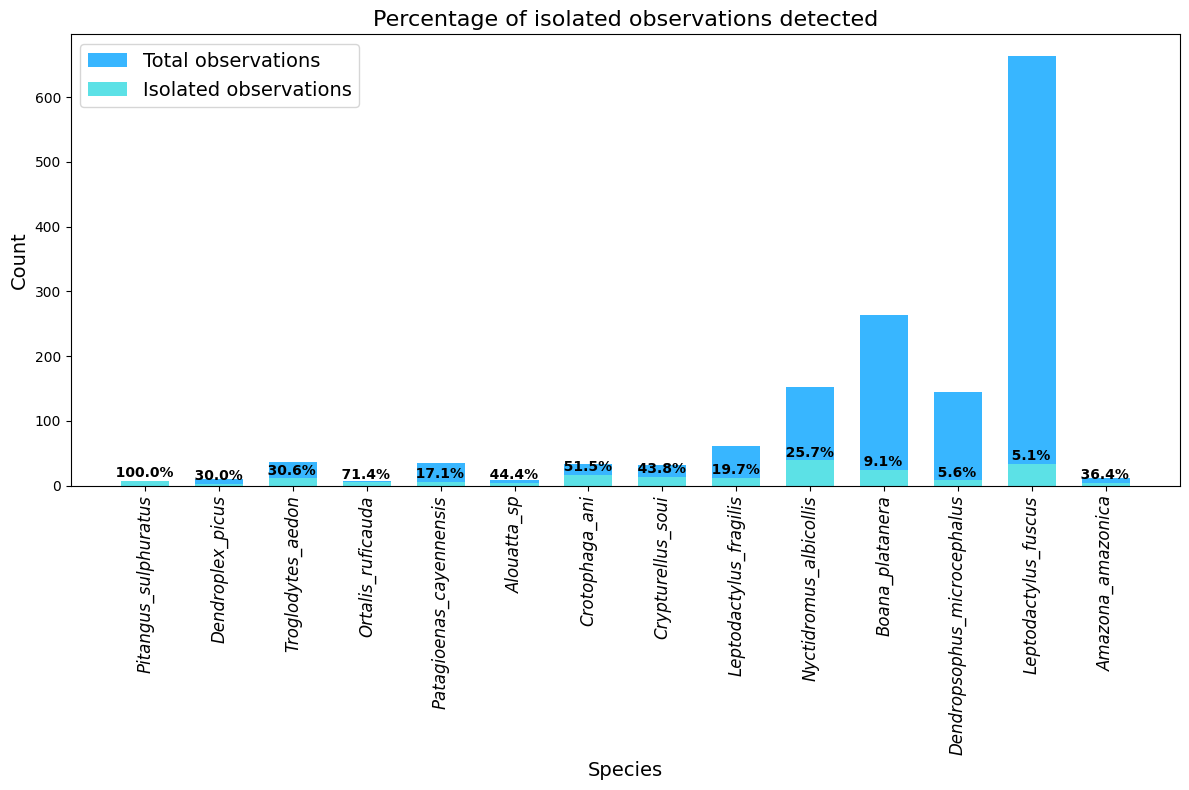

In [ ]:
# Calculate species order by average distance (reuse from previous function)
species_order = lonely_observations_df.groupby('Specie_ID')['Distance'].mean().sort_values(ascending=False).index
# Reorder total counts and isolated counts based on species_order
total_counts_df_reduced = df_reduced['Specie_ID'].value_counts().reindex(species_order, fill_value=0)
isolated_counts_lonely = lonely_observations_df['Specie_ID'].value_counts().reindex(species_order, fill_value=0)


# Calculate the percentage of isolated observations for each Specie_ID
percentage_isolated = (isolated_counts_lonely / total_counts_df_reduced * 100).sort_index()

# Create an index array to align the bars
indices = np.arange(len(total_counts_df_reduced))

# Set the figure size
fig, ax = plt.subplots(figsize=(12, 8))

# Set the bar width
bar_width = 0.65

# Plot the bars with offset
ax.bar(indices, total_counts_df_reduced, width=bar_width, color='#38b6ff', label='Total observations')
ax.bar(indices , isolated_counts_lonely, width=bar_width, color='#5ce1e6', label='Isolated observations')

# Add percentage labels for isolated observations
for idx, (specie, count) in enumerate(isolated_counts_lonely.items()):
    if specie in percentage_isolated:
        percentage = percentage_isolated[specie]
        ax.text(idx - bar_width/6, count + 1, f'   {percentage:.1f}%', ha='center', va='bottom', fontsize=10, color= 'black', fontweight='bold')

# Labels and title with increased font size
ax.set_xlabel('Species', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.set_title('Percentage of isolated observations detected', fontsize=16)
ax.set_xticks(indices)
ax.set_xticklabels(total_counts_df_reduced.index, rotation=90,  fontsize=12, fontstyle='italic')
ax.legend(fontsize=14)

plt.tight_layout()
plt.show()


# Create Pseudo Cleaning Dataset
by removing labels from the original dataset that are part of lonely labels.
Output: pseudo_clean_df

In [43]:
indices_to_remove = lonely_observations_df['Lonely Index']
pseudo_clean_df = df_reduced.drop(indices_to_remove)

### Compute false positives
False positives are isolated observations detected on pseudo clean dataset

In [58]:
only_features_scaled = scale_features(pseudo_clean_df)
lonely_observations_filtered, lonely_observations_filtered_df = find_lonely_observations(pseudo_clean_df, only_features_scaled)

(observations_high_review, observations_moderate_review, observations_moderate_high_review, observations_low_review) = process_lonely_observations(pseudo_clean_df, lonely_observations_filtered_df)

#Calculate the percentage of "lonely" observations
num_lonely_observations = len(lonely_observations_filtered_df)
num_total_observations = len(pseudo_clean_df)
percentage_lonely = (num_lonely_observations / num_total_observations) * 100

# Display the result}
# Print the results with the percentage in the same line
print(f"\nThe total number of observations of the Pseudo Clean Dataset is: {num_total_observations}")
print(f'The number of false positives is: {num_lonely_observations}')
print(f"Percentage of false positives in relation with the Pseudo Clean Dataset: {percentage_lonely:.2f}%")





The total number of observations of the Pseudo Clean Dataset is: 1277
The number of false positives is: 26
Percentage of false positives in relation with the Pseudo Clean Dataset: 2.04%


# Computing values on Artificially modified labels

In [45]:
# Apply the modification and get the modified DataFrame and modifications DataFrame
df_modified, modifications_df = modify_species_id(pseudo_clean_df, random_state=42)


### Reporting results of computed values over the artificially modified dataset

In [61]:
# Scale the features of the modified DataFrame
only_features_scaled = scale_features(df_modified)

# Find lonely observations in the modified DataFrame
lonely_observations, lonely_observations_modified_df = find_lonely_observations(df_modified, only_features_scaled)

(observations_high_review, observations_moderate_review, observations_moderate_high_review, observations_low_review) = process_lonely_observations(df_modified, lonely_observations_modified_df)

# Calculate the number of total observations and lonely observations
num_total_observations = len(pseudo_clean_df)
num_modified_indices = len(modifications_df)
num_lonely_observations = len(lonely_observations_modified_df)

# Calculate the percentage of lonely observations
percentage_lonely = (num_lonely_observations / num_total_observations) * 100
# Compute the percentage for moderate-high review potential observations
percentage_moderate_high_review = (len(observations_moderate_high_review) / num_total_observations)*100

# Display the results for lonely observations
print(f"The amount of artificially modified labels is: {num_modified_indices}")
print(f"The isolated observations detected by the method is: {num_lonely_observations} ({percentage_lonely:.2f}%)")


The amount of artificially modified labels is: 127
The isolated observations detected by the method is: 176 (13.78%)


## Confusion Matrix of artificially modified labels

## K-fold validation for the method

### computed on all isolated observations

In [ ]:
k = 10  # Number of folds

# Initialize lists to store the results
confusion_matrices = []
tp_list = []
fp_list = []
fn_list = []
tn_list = []

precision_list = []
recall_list = []
f1_score_list = []
accuracy_list = []

np.random.seed(42)
for fold_number in range(k):  
    random_state = np.random.choice(range(1, 51))
   
    # Apply modifications and process the data
    df_modified, modifications_df = modify_species_id(pseudo_clean_df, random_state=random_state)
    only_features_scaled = scale_features(df_modified)
    lonely_observations, lonely_observations_modified_df = find_lonely_observations(df_modified, only_features_scaled)
    (obs_H, obs_M, obs_MH, obs_L) = process_lonely_observations(df_modified, lonely_observations_modified_df)


    modified_indices_set = set(modifications_df['Index'])
    lonely_indices_set = set(lonely_observations_modified_df['Lonely Index'])
    #lonely_indices_set = set(obs_MH['Lonely Index'])
    total_indices = set(pseudo_clean_df.index)   

    # Calculate confusion matrix and metrics
    confusion_matrix, classification_metrics, cm, TP, FP, FN, TN = calculate_confusion_matrix_and_metrics(modified_indices_set, lonely_indices_set, total_indices)

    # Store the confusion matrix and metrics
    confusion_matrices.append(confusion_matrix)
    tp_list.append(TP)
    fp_list.append(FP)
    fn_list.append(FN)
    tn_list.append(TN)

    # Extract and store the precision, recall, f1-score, and accuracy for "Modified" class
    precision_list.append(classification_metrics['Modified']['precision'])
    recall_list.append(classification_metrics['Modified']['recall'])
    f1_score_list.append(classification_metrics['Modified']['f1-score'])
    accuracy_list.append(classification_metrics['accuracy'])



Average true positives across 10 folds: 122.200 ± 2.600
Average false positives 10 folds: 58.200 ± 4.854
Average false negatives across 10 folds: 4.800 ± 2.600
Average true negatives across 10 folds: 1091.800 ± 4.854
Average isolated observations detected: 180.4 ± 6.4

Average Precision across 10 folds: 0.678 ± 0.017
Average Recall across 10 folds: 0.962 ± 0.020
Average F1-Score across 10 folds: 0.795 ± 0.014
Average Accuracy across 10 folds: 0.951 ± 0.004

Average Confusion Matrix across all folds:


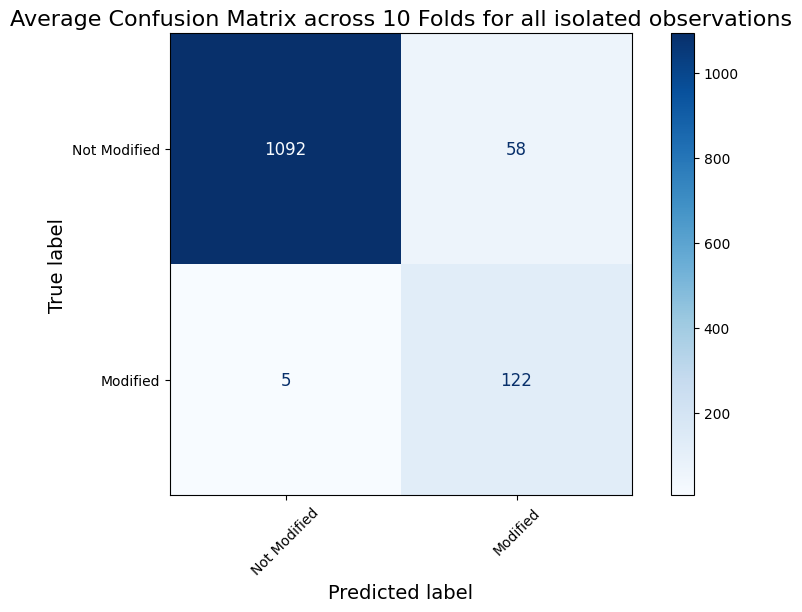

In [48]:
#Calculate average metrics across all folds
avg_tp = np.mean(tp_list)
avg_fp = np.mean(fp_list)
avg_fn = np.mean(fn_list)
avg_tn = np.mean(tn_list)

#Calculate standard deviation metrics across all folds
std_tp = np.std(tp_list)
std_fp = np.std(fp_list)
std_fn = np.std(fn_list)
std_tn = np.std(tn_list)

# Print the average metrics with standard deviation
print("\nAverage true positives across 10 folds: {:.3f} ± {:.3f}".format(avg_tp, std_tp))
print("Average false positives 10 folds: {:.3f} ± {:.3f}".format(avg_fp, std_fp))
print("Average false negatives across 10 folds: {:.3f} ± {:.3f}".format(avg_fn, std_fn))
print("Average true negatives across 10 folds: {:.3f} ± {:.3f}".format(avg_tn, std_tn))


# Calculate the sum of TP and FP for each fold (previously called lonely_observations)
lonely_obs_sum = np.array(tp_list) + np.array(fp_list)

# Calculate the average of the summed lonely observations
avg_lonely_obs_sum = np.mean(lonely_obs_sum)

# Calculate the standard deviation of the summed lonely observations
std_lonely_obs_sum = np.std(lonely_obs_sum, ddof=1)

# Calcular y mostrar el resultado con formateo
print(f"Average isolated observations detected: {avg_lonely_obs_sum:.1f} ± {std_lonely_obs_sum:.1f}")



# Calculate average precision, recall, f1-score, and accuracy
avg_precision = np.mean(precision_list)
avg_recall = np.mean(recall_list)
avg_f1_score = np.mean(f1_score_list)
avg_accuracy = np.mean(accuracy_list)

# Calculate standard deviation for each metric across all folds
std_precision = np.std(precision_list)
std_recall = np.std(recall_list)
std_f1_score = np.std(f1_score_list)
std_accuracy = np.std(accuracy_list)

# Print the average metrics with standard deviation
print("\nAverage Precision across 10 folds: {:.3f} ± {:.3f}".format(avg_precision, std_precision))
print("Average Recall across 10 folds: {:.3f} ± {:.3f}".format(avg_recall, std_recall))
print("Average F1-Score across 10 folds: {:.3f} ± {:.3f}".format(avg_f1_score, std_f1_score))
print("Average Accuracy across 10 folds: {:.3f} ± {:.3f}".format(avg_accuracy, std_accuracy))


# Calculate average confusion matrix
avg_confusion_matrix = pd.DataFrame({
    'Predicted Modified': [avg_tp, avg_fp],
    'Predicted Not Modified': [avg_fn, avg_tn]
}, index=['Actual Modified', 'Actual Not Modified'])


# Display the average confusion matrix
print("\nAverage Confusion Matrix across all folds:")
#print(avg_confusion_matrix)

# Prepare the confusion matrix for plotting (correct order)
cm = np.array([[avg_tn, avg_fp], [avg_fn, avg_tp]])
cm_rounded = np.round(cm)
cm_rounded = cm_rounded.astype(int)

plot_confusion_matrix(cm_rounded, title='Average Confusion Matrix across 10 Folds for all isolated observations')

1. Precision:
Intuition: Of all the times the model predicted positive, how many times was it correct?
2. Accuracy:
Intuition: Out of all the predictions the model made, how often did it predict correctly?
3. Recall (also known as Sensitivity):
Intuition: Of all the actual positive cases, how many did the model correctly identify?